# Supervised Learning 

**Alberto Gonzalez Delgado**

12/2022

*(Dataset 12)*

## Introduction
Colorectal cancer early diagnosis and treatment can lead to a full recovery. Different individual response differntly to the tratment due to its genetic information. 
The different SNPs from different individuals that have been diagnoses with rectal colon cancer is presented as ('MM', 'WW','WM','MW'). The response of treatment is presented as R (good) or NR  (bad).

The dataset contains 53 individuals (rows), 21 features (associated to different SNPs), and 1 target value (‘Target’). The values of the data files retrieved are already transformed to 0 for ‘MM’, 1 for ‘WW’, 2 for ‘WM’, and 3 for ‘MW’ values in order to be compatible with all the ML learning models format.


### Importing neccesary dependencies

In [30]:
#Manipulation of the data
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype 

#Data isualization
import matplotlib.pyplot as pt

#Splitting the data
from sklearn.model_selection import train_test_split

#Cross-validation
from sklearn.model_selection import cross_val_score, KFold

#Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

#kNN
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  plot_roc_curve

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

#MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

### Loading data from file

I used pandas to read the csv file and I printed the first rows to have a preliminary visualization of the data



In [31]:
import pandas
df = pandas.read_csv('dataset12.csv')
df[0:5]

,Unnamed: 0,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,0,R,0,1,2,1,0,2,1,1,...,2,0,1,0,0,2,2,0,2,2
1,1,R,1,0,1,2,0,2,0,0,...,2,1,0,0,2,0,0,0,1,1
2,2,R,1,2,0,1,0,0,0,1,...,0,1,2,0,1,0,0,1,0,0
3,3,R,0,0,0,0,1,2,1,0,...,2,2,2,2,2,0,1,0,1,1
4,4,R,0,0,2,0,1,2,0,1,...,1,0,0,0,2,0,1,1,1,1


It can be seen that each patient (each row) has an ID. This ID will be deleted in order to don't use it in the model selection, training and testing process. The target column is the second one, which values can be R or NR. The rest of the columns are features associated to different SNPs which values can be 0 for ‘MM’, 1 for ‘WW’, 2 for ‘WM’, and 3 for ‘MW’

### Exploratory Data Analysis & Preprocessing

In [32]:
df=df.drop(columns='Unnamed: 0')
df[0:10]

,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,n_rs3229523,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,R,0,1,2,1,0,2,1,1,0,...,2,0,1,0,0,2,2,0,2,2
1,R,1,0,1,2,0,2,0,0,0,...,2,1,0,0,2,0,0,0,1,1
2,R,1,2,0,1,0,0,0,1,1,...,0,1,2,0,1,0,0,1,0,0
3,R,0,0,0,0,1,2,1,0,1,...,2,2,2,2,2,0,1,0,1,1
4,R,0,0,2,0,1,2,0,1,1,...,1,0,0,0,2,0,1,1,1,1
5,R,0,0,2,2,1,2,0,3,3,...,1,0,2,2,1,2,0,0,1,1
6,R,1,2,1,2,1,0,1,2,2,...,2,1,1,0,1,1,2,3,1,1
7,R,0,2,1,1,0,2,0,0,1,...,2,0,2,0,0,2,1,0,0,0
8,R,0,0,2,2,1,2,0,2,1,...,2,0,0,2,2,2,1,2,1,1
9,R,0,1,0,0,0,2,0,2,2,...,2,1,1,0,0,1,2,0,2,2


In [33]:
df.columns

Index(['Target', 'n_rs3188513', 'n_rs9960669', 'n_rs2602', 'n_rs5445365',
       'n_rs133061', 'n_rs10102851', 'n_rs8375668', 'n_rs3015353',
       'n_rs3229523', 'n_rs6236416', 'n_rs5274755', 'n_rs9280789',
       'n_rs2515462', 'n_rs9025039', 'n_rs94282819', 'n_rs344903', 'n_rs0370',
       'n_rs9072249', 'n_rs0220', 'n_rs833068', 'n_rs933069'],
      dtype='object')

Here I printed the name of the columns that corresponds to the features explained above. First, I will search if there is any duplicated row. Then, I will print some information and description about the data.

In [34]:
df.duplicated().sum()

0

There is not any duplicated row so it is not neccesary to clean the data.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Target        53 non-null     object
 1   n_rs3188513   53 non-null     int64 
 2   n_rs9960669   53 non-null     int64 
 3   n_rs2602      53 non-null     int64 
 4   n_rs5445365   53 non-null     int64 
 5   n_rs133061    53 non-null     int64 
 6   n_rs10102851  53 non-null     int64 
 7   n_rs8375668   53 non-null     int64 
 8   n_rs3015353   53 non-null     int64 
 9   n_rs3229523   53 non-null     int64 
 10  n_rs6236416   53 non-null     int64 
 11  n_rs5274755   53 non-null     int64 
 12  n_rs9280789   53 non-null     int64 
 13  n_rs2515462   53 non-null     int64 
 14  n_rs9025039   53 non-null     int64 
 15  n_rs94282819  53 non-null     int64 
 16  n_rs344903    53 non-null     int64 
 17  n_rs0370      53 non-null     int64 
 18  n_rs9072249   53 non-null     int64 
 19  n_rs0220  

All the columns are numeric, except the target. Since all the columns are non nullable, I will not search for null values in the data.

In [36]:
df.describe().transpose()[1:-1]

,count,mean,std,min,25%,50%,75%,max
n_rs9960669,53.0,1.396226,0.839863,0.0,1.0,2.0,2.0,2.0
n_rs2602,53.0,1.188679,0.833358,0.0,0.0,1.0,2.0,2.0
n_rs5445365,53.0,1.283019,0.769049,0.0,1.0,1.0,2.0,2.0
n_rs133061,53.0,0.830189,0.777962,0.0,0.0,1.0,1.0,2.0
n_rs10102851,53.0,1.547170,0.798220,0.0,1.0,2.0,2.0,2.0
n_rs8375668,53.0,0.660377,0.830741,0.0,0.0,0.0,1.0,2.0
n_rs3015353,53.0,1.056604,0.886113,0.0,0.0,1.0,2.0,3.0
n_rs3229523,53.0,0.849057,0.841158,0.0,0.0,1.0,1.0,3.0
n_rs6236416,53.0,1.245283,0.917892,0.0,0.0,2.0,2.0,2.0
n_rs5274755,53.0,1.396226,0.884473,0.0,1.0,2.0,2.0,3.0


In this visualization of some stadistics from the data. Since the target column is not numeric it is not printed. All the columns have the same number of rows. All the features have the same minimum (0: MM), whereas most of them have not MW SNP (3).

Since the features can only have as values 0,1,2 or 3 it can be supposed that all the features has the same scala.

The next plot shows the distribution of the data in each feature (diagonal) and the relationship between the data of each pair of features

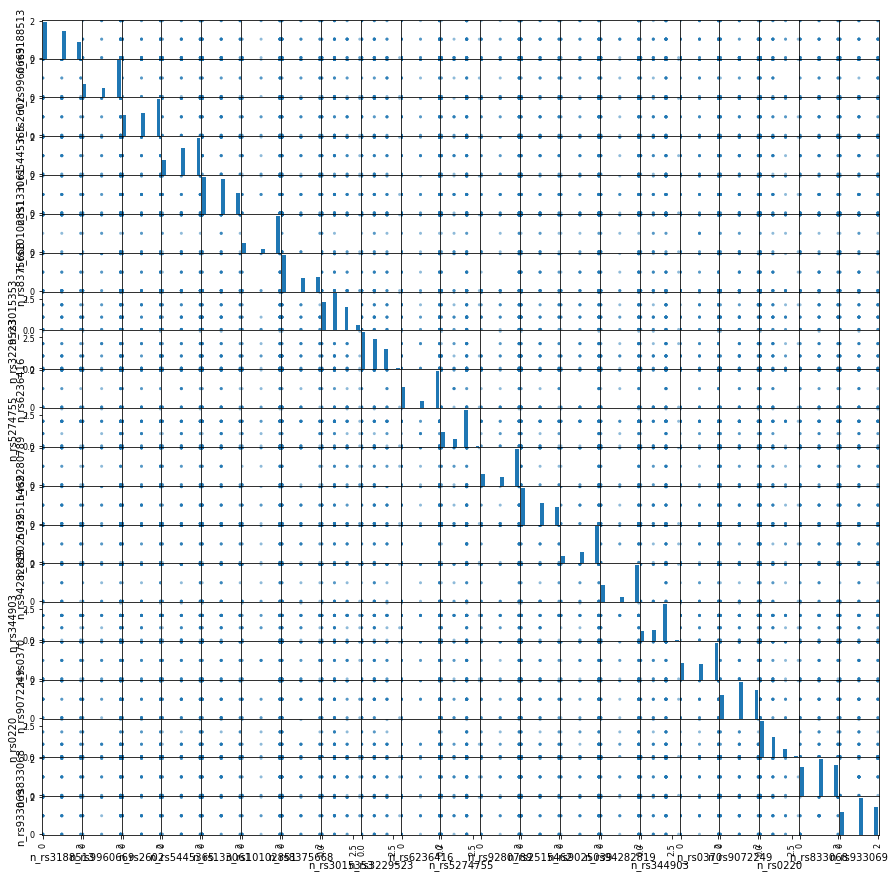

In [37]:
pd.plotting.scatter_matrix(df,figsize=(15,15))
pt.show()

As I told above, some of the features has not MW SNP (3) as it can be seen in the diagonal, since some of the features have not 4 columns. The features are related with each other between 9 and 16 goups (correspondient too 3 or 4 groups of SNPs). This plot also gives information about the scale, that is the same for all the features.

Since the target data is categorical, I will change it into numeric due to most of the machine learning algorithms have problems with non-numeric data. If the treatment result was good (R), the value will be 1 and if the treatment result was bad (NR), the value will be 0.



In [38]:
df['Target']=df["Target"].map({"NR" :0, "R":1})

In [39]:
df[0:5]

,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,n_rs3229523,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,1,0,1,2,1,0,2,1,1,0,...,2,0,1,0,0,2,2,0,2,2
1,1,1,0,1,2,0,2,0,0,0,...,2,1,0,0,2,0,0,0,1,1
2,1,1,2,0,1,0,0,0,1,1,...,0,1,2,0,1,0,0,1,0,0
3,1,0,0,0,0,1,2,1,0,1,...,2,2,2,2,2,0,1,0,1,1
4,1,0,0,2,0,1,2,0,1,1,...,1,0,0,0,2,0,1,1,1,1


Here I'm creating two new variables that contains features and target columns:

* x: Features columns
* y: Target column

In [40]:
X = df.drop('Target', axis=1)
y = df['Target']

Since the categorical data has already been changed into numerical, I'm using CategoricalDtype from pandas.api.types (instead of OneHot Encoder so that all the columns have the posivility of having the four possible values and, as I said above, some columns have not 3 in some SNP). So that all the features have the same weight when calculating since it is not being computed the distance. The features will be splited into 4 columns, correspondient to their 4 possible values (0,1,2,3) and the actual values will be 0 or 1 (this particular SNP is present [1] or not [2]). So, each SNP is now splitted into each possible value (0,1,2,3) and the values of each possible value of the SNP now is 0 (the patient has not this specific SNP) or 1 (the patien has this specific SNP).

In [41]:
cols=[X.columns[i] for i in range(len(X.columns))]
X[cols]=X[cols].astype(CategoricalDtype([0,1,2,3]))
x_f=pd.get_dummies(X[cols])

Here I print some columns of the new features data. Watch how now, each column in the raw data (i.e., n_rs3188513) has been splited into 4 columns (the posible values of the SNO n_rs3188513[_0],n_rs3188513[_1],n_rs3188513[_2],n_rs3188513[_3] )

In [42]:
x_f[0:5]

,n_rs3188513_0,n_rs3188513_1,n_rs3188513_2,n_rs3188513_3,n_rs9960669_0,n_rs9960669_1,n_rs9960669_2,n_rs9960669_3,n_rs2602_0,n_rs2602_1,...,n_rs0220_2,n_rs0220_3,n_rs833068_0,n_rs833068_1,n_rs833068_2,n_rs833068_3,n_rs933069_0,n_rs933069_1,n_rs933069_2,n_rs933069_3
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Here I display the distribution of the target values. 

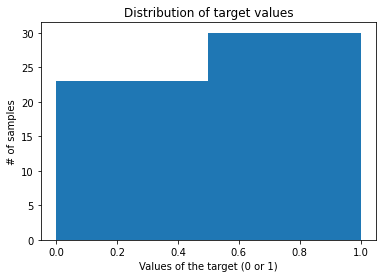

In [43]:
pt.hist(y,bins=2)
pt.title("Distribution of target values")
pt.ylabel("# of samples")
pt.xlabel("Values of the target (0 or 1)")
pt.show()

It can be seen that the target values are distributed, each one being approximately half of the total data (slightly more 1 than 0).

Now, I split the data into train and test sets (x and y) so, once I have selected the best parameters for each model I can train a machine learning model for each of them and create validation parameters. Moreover, I use train set in the selection of the best parameters to use in each model

In [104]:
#Train set contains validation set
xtrain, xtest, ytrain, ytest = train_test_split(x_f,y, random_state = 5, test_size = 0.2)


# Selecting the best parameters of each model

In order to obtain the best parameters for each model to predict how the target value will be depending on the input data (if the treatment will have good results depending on the SNP the patien has), I used sklearn.model_selection.GridSearchCV using k-fold validation. This funcion retreives the best parameters to use in each model in our dataset.

I used k = 15, increasing the fold (respecting the most used and accepted value: k=10) due to I increased the size of the test size (20% instead of 10% due to the small size of my dataset) so the results I get are more stable and robust.

On the other hand, I used as a measure to select the best model the f1 score which is a measure of accuracy (true positives / all positives values) and recall (true positive rate). This is because this score measures how good a model is at distinguishing all patients who are going to have a good response with good accuracy and sensitivity.

In [105]:
kf = KFold(n_splits=15, shuffle=True, random_state=5) 

In [106]:
#define the grid search parameters
parameters = {
        'KNeighborsClassifier': {
        'n_neighbors': range(1,50),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto'],
        'leaf_size': range(5,30),
        'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski','cosine'] 
    },
    'LogisticRegression': {
         'penalty':['l1','l2','elasticnet', 'none'],
        'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
        'solver':['liblinear','lbfgs'], #liblinear is the best for small datasets
        'max_iter':[100, 200, 500, 1000]
    },
    'DecisionTreeClassifier': {
        'max_depth': [1, 5, 10, 20, 50, 100],
        'min_samples_split': range(2,5),
        'criterion': ['gini', 'entropy']
    },
    'RandomForestClassifier': {
        'n_estimators': [1, 5, 10, 20, 50, 100],
        'max_depth': [1, 5, 10, 20, 50, 100]
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(100,), (100,100), (100,100,100)],
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['liblinear','lbfgs'],# liblinear is the best for small datasets
        'alpha': [0.0001,0.001,0.01,1,10,100]
    }
}

#define the models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'MLPClassifier': MLPClassifier()
}

models_table=pd.DataFrame(columns=['model','parameters'])
#loop through models
for key, model in models.items():
    #define grid search
    grid = GridSearchCV(model, parameters[key], cv=kf, scoring='f1', n_jobs=-1, verbose=1)
    #fit the model
    grid.fit(xtrain, ytrain)
    
    #print the best params and score
    print("----------------------------------------------------")
    print(f'Best parameters for {key}: {grid.best_params_} ')
    print("----------------------------------------------------")
    models_table=models_table.append({'model':key , 'parameters':grid.best_params_},ignore_index=True)


Fitting 15 folds for each of 12250 candidates, totalling 183750 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.69777778 0.69777778 0.53111111 ...        nan        nan        nan]
  warnings.warn(


----------------------------------------------------
Best parameters for KNeighborsClassifier: {'algorithm': 'auto', 'leaf_size': 5, 'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'} 
----------------------------------------------------
Fitting 15 folds for each of 224 candidates, totalling 3360 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.                nan 0.72444444 0.72444444        nan        nan
        nan 0.75333333 0.                nan 0.72444444 0.72444444
        nan        nan        nan 0.75333333 0.                nan
 0.72444444 0.72444444        nan        nan        nan 0.75333333
 0.                nan 0.72444444 0.72444444        nan        nan
        nan 0.75333333 0.                nan 0.76       0.72444444
        nan        nan        nan 0.75333333 0.                nan
 0.76       0.72444444        nan        nan        nan 0.75333333
 0.                nan 0.76       0.72444444        nan        nan
        nan 0.75333333 0.                nan 0.76       0.72444444
        nan        nan        nan 0.75333333 0.                nan
 0.83333333 0.82222222        nan        nan        nan 0.75333333
 0.                nan 0.83333333 0.82222222        n

----------------------------------------------------
Best parameters for LogisticRegression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} 
----------------------------------------------------
Fitting 15 folds for each of 36 candidates, totalling 540 fits
----------------------------------------------------
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3} 
----------------------------------------------------
Fitting 15 folds for each of 36 candidates, totalling 540 fits
----------------------------------------------------
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 50} 
----------------------------------------------------
Fitting 15 folds for each of 108 candidates, totalling 1620 fits
----------------------------------------------------
Best parameters for MLPClassifier: {'activation': 'tanh', 'alpha': 10, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'} 
-----------------

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.77555556        nan 0.77555556        nan 0.77555556
        nan 0.75333333        nan 0.75333333        nan 0.75333333
        nan 0.75333333        nan 0.75333333        nan 0.75333333
        nan 0.75333333        nan 0.72444444        nan 0.72444444
        nan 0.72444444        nan 0.72444444        nan 0.72444444
        nan 0.72444444        nan 0.72444444        nan 0.72444444
        nan 0.75333333        nan 0.77555556        nan 0.75333333
        nan 0.77555556        nan 0.79777778        nan 0.77555556
        nan 0.75333333        nan 0.77555556        nan 0.75333333
        nan 0.75333333        nan 0.75333333        nan 0.75333333
        nan 0.82222222        nan 0.73777778        nan 0.72444444
        nan 0.72444444        nan 0.72444444        nan 0.72444444
        nan 0.77555556        nan 0.75333333        n

I created a table when I saved the best parameters of each model:

In [107]:
print(models_table)
models_table.to_csv('table_models.csv', sep="\t")

                    model                                         parameters
0    KNeighborsClassifier  {'algorithm': 'auto', 'leaf_size': 5, 'metric'...
1      LogisticRegression  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...
2  DecisionTreeClassifier  {'criterion': 'gini', 'max_depth': 10, 'min_sa...
3  RandomForestClassifier              {'max_depth': 10, 'n_estimators': 50}
4           MLPClassifier  {'activation': 'tanh', 'alpha': 10, 'hidden_la...


Once I selected the best parameters for each model, I will train and test them using those parameters, training and test sets. The validation of the test is tested by the following aspects:

- Predicting vs Experimental values (Error rate).

- Confusion Matrix.

- Train and test classification reports.

- Receiver Operating Characeristic (ROC) and Area Under Curve (AUC).

## k-Nearest Neighbors (KNN) 
The k Nearest Neighbor (kNN) algorithm is used as a method for big data mining to predict the labels of test data by inducing all training data 
It is a non-parametric classification algorithm in which a labelled training dataset is provided where the data points are categorized into various classes, so that the class of an unlabelled data can be predicted. For a new input data, the k nearest neighbors is calculated and the majority label among the neighbouring data decides the label for this new input.

The best parameter are {'algorithm': 'auto', 'leaf_size': 5, 'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}  according to GridSearch.

    Actual_vals  Predicted_vals
49            0               0
44            1               1
17            1               1
31            0               0
45            0               0
46            0               0
34            0               0
32            0               0
6             1               1
52            0               0
2             1               1
Test error: 0.0
------------------- Confusion matrix -------------------


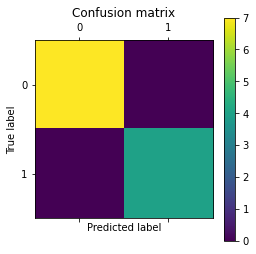


----------------Train Classification report ------------------

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.93      0.96      0.94        26

    accuracy                           0.93        42
   macro avg       0.93      0.92      0.92        42
weighted avg       0.93      0.93      0.93        42

------------------- Test Classification report -------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [108]:
#Training and testing the k-NN model for k=12

# Create an instance of Logistic Regression Classifier and fit the data.
knn = KNeighborsClassifier(n_neighbors = 12 ,metric='euclidean',algorithm='auto', leaf_size= 5,weights='uniform')
knn.fit(xtrain, ytrain)

# Make predictions on the train data
y_train_pred = knn.predict(xtrain)
# Make predictions on the test data
y_pred=knn.predict(xtest)


#Printing the actual and predicted values
predicts=pd.DataFrame({'Actual_vals': ytest , 'Predicted_vals':y_pred})
print(predicts)
print('Test error: ' + str(np.mean(y_pred != ytest)))

print('------------------- Confusion matrix -------------------')
pt.matshow( confusion_matrix(ytest, y_pred))
pt.title('Confusion matrix')
pt.colorbar()
pt.ylabel('True label')
pt.xlabel('Predicted label')
pt.show()
print('')
print('----------------Train Classification report ------------------')
print('')
print(classification_report(ytrain, y_train_pred))
print('------------------- Test Classification report -------------------')
print('')
print(classification_report(ytest, y_pred))


First, I printed some experimental (or actual) values and the prediction that the model did. It can be seen that the model predicted all the actual valus well, with an error rate of 0.0.

In the confusion matrix, it can be seen that there are 0 both false positives and false negatives. So, this model predicted as NR and R with no error (watch the test classification report: f1 and accuracy=1). In addition, this model does not seem to be overfitted, due to it has a good accuracy, prescision, recall and f1-score in the test data but it is not perfect fitted to this data.

The receiver operating characeristic (ROC) curve illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The area under the curve (AUC) is a measure of how well a binary classifier performs. It is the area under the ROC curve, which ranges from 0 to 1, with 1 being a perfect classifier and 0.5 being no better than random guessing (representated in the following plot by the dashed red line) (Fawcett, T., n.d.).

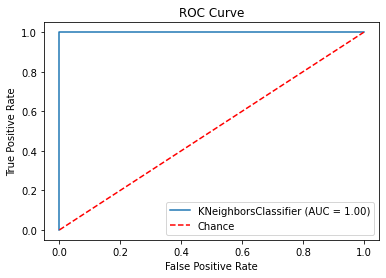

In [109]:
plot_roc_curve(knn,xtest,ytest)
pt.title('ROC Curve')
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
pt.plot([0,1],[0,1],linestyle='--',color='r',label="Chance")
pt.legend()
pt.show()

As the AUC = 1.00 it can be said that this model is a perfect classifier. In addition, having into account the accuracy, F1 score and recall of the model in the test data, this model is a good model for predicting the behavior of the drug in the patient depending on the SNPs present in this person. However, it must be underlined that I created the model using a small data set. So, it would be neccesary to collect more data to affirm that this hypothesis is correct.

## Logistic Regression Model

It is used to obtain odds ratio in the presence of more than one explanatory variable. The response variable is binomial: 0 as false 1 as true (Sperandei S., 2014). In other words, this model will try to predict two values: 1 (R) or 0 (NR) as responses of the treatment based on the SNP features.

According to GridSearch, the best parameters for Logistic Regression are {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} 

    Actual_vals  Predicted_vals
49            0               0
44            1               1
17            1               1
31            0               1
45            0               0
46            0               0
34            0               0
32            0               1
6             1               1
52            0               0
2             1               1
Test error: 0.18181818181818182
------------------- Confusion matrix -------------------


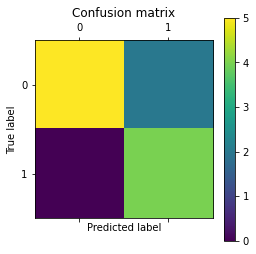


----------------Train Classification report ------------------

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.90      1.00      0.95        26

    accuracy                           0.93        42
   macro avg       0.95      0.91      0.92        42
weighted avg       0.94      0.93      0.93        42

------------------- Test Classification report -------------------

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.67      1.00      0.80         4

    accuracy                           0.82        11
   macro avg       0.83      0.86      0.82        11
weighted avg       0.88      0.82      0.82        11



In [110]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=0.1, max_iter=100 , solver='liblinear',penalty='l2')
logreg.fit(xtrain, ytrain)

# Make predictions on the train data
y_train_pred = logreg.predict(xtrain)
# Make predictions on the test data
y_pred=logreg.predict(xtest)

#Printing the actual and predicted values
predicts=pd.DataFrame({'Actual_vals': ytest , 'Predicted_vals':y_pred})
print(predicts)
print('Test error: ' + str(np.mean(y_pred != ytest)))

print('------------------- Confusion matrix -------------------')
pt.matshow( confusion_matrix(ytest, y_pred))
pt.title('Confusion matrix')
pt.colorbar()
pt.ylabel('True label')
pt.xlabel('Predicted label')
pt.show()
print('')
print('----------------Train Classification report ------------------')
print('')
print(classification_report(ytrain, y_train_pred))
print('------------------- Test Classification report -------------------')
print('')
print(classification_report(ytest, y_pred))


First, I printed some experimental (or actual) values and the prediction that the model did. The model made good predictions, with an error rate ~0.2 , which is pretty low.


In the confusion matrix, it can be seen that there are 1 false positives and 0 false negatives. So, this model predicted as NR and R witha low error (watch the test classification report: f1 and accuracy ~0.8). In addition, this model does not seem to be overfitted, due to it has a good accuracy, prescision, recall and f1-score in the test data but it is not perfect fitted to this data. 

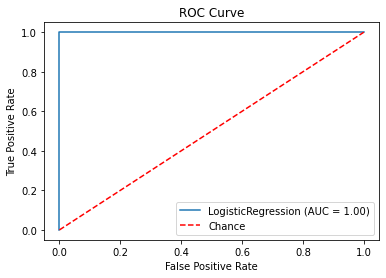

In [111]:
plot_roc_curve(logreg,xtest,ytest)
pt.title('ROC Curve')
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
pt.plot([0,1],[0,1],linestyle='--',color='r',label="Chance")
pt.legend()
pt.show()

As the AUC = 1.00 it can be said that this model is a perfect classifier. As a conclusion, this is also a good model for predicting NR and R in patients depending on their SNP. Nevertheless, the development of k-NN model is better due to its perfect F1-score, recall, precision, accuracy and AUC.

## Decision Trees

A decision tree is a machine learning algorithm that is used for classification and regression tasks. It works by constructing a tree-like model of decisions based on the features of an input data set. Each internal node of the tree represents an attribute, and each leaf node represents a class label. The branches of the tree represent the decision rules that are used to classify instances.

Decision trees are a popular choice for machine learning because they are easy to understand and interpret, and they can be used to make predictions for both categorical and continuous variables (Aurélien G., 2019). 

According to GridSearch the best classifiers for Decision Tree are {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3}


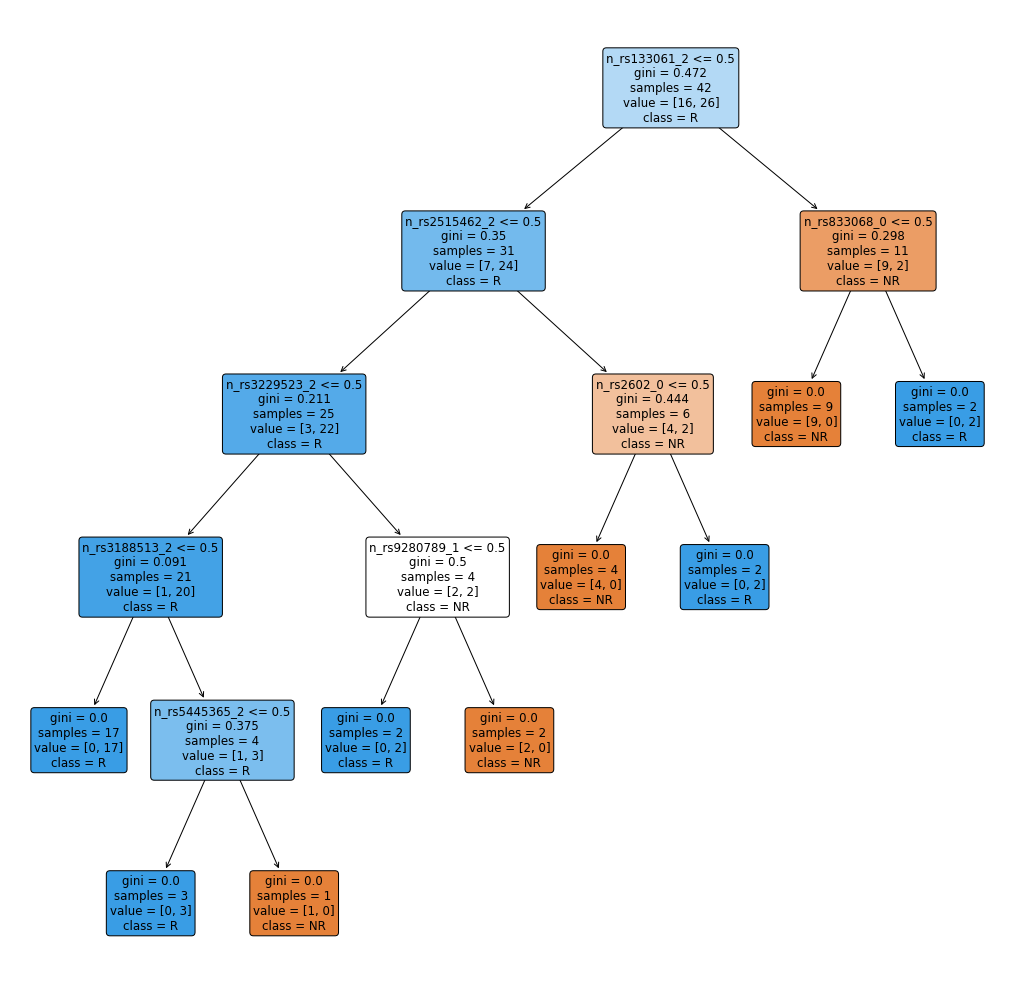

In [112]:
dtc=DecisionTreeClassifier(criterion='gini', max_depth=10 , min_samples_split=3)
dtc.fit(xtrain, ytrain)
features=[x_f.columns[i] for i in range(len(x_f.columns))]
pt.figure(figsize=(18,18))
plot_tree(dtc,feature_names=features,filled=True,precision=3,label='all',impurity=True,rounded=True,class_names=['NR','R'])
pt.show()


According to the Decission Tree Model, the following 9 rules lead to good (R) or bad (NR) response of the treatment in the patients. It can be interpreted as rules such as (IF ____ THEN ___) in the plot. For instance, the three first rules:

1. IF WM in n_rs1336061 && MM in n_rs833068 THEN good response
2. IF WM in n_rs1336061 && no MM in n_rs833068 THEN bad response
3. IF no WM in n_rs1336061 && WM in n_rs2515462 && MM in n_rs2602 THEN good response.
4. IF no WM in n_rs1336061 && WM in n_rs2515462 && no MM in n_rs2602 THEN bad response.
5. IF no WM in n_rs1336061 && no WM in n_rs2515462 && WM in n_rs3229523 && WW in n_rs9280789 THEN bad response.
6. IF no WM in n_rs1336061 && no WM in n_rs2515462 && WM in n_rs3229523 && no WW in n_rs9280789: THEN good response.
7. IF no WM in n_rs1336061 && no WM in n_rs2515462 && no WM in n_rs3229523 && WM in n_rs3188513 && WM in n_rs5445365 THEN bad response.
8. IF no WM in n_rs1336061 && no WM in n_rs2515462 && no WM in n_rs3229523 && WM in n_rs3188513 && no WM in n_rs5445365 THEN good response.
9. IF no WM in n_rs1336061 && no WM in n_rs2515462 && no WM in n_rs3229523 && no WM in n_rs3188513 THEN good response.

    Actual_vals  Predicted_vals
49            0               0
44            1               1
17            1               1
31            0               1
45            0               0
46            0               0
34            0               1
32            0               1
6             1               1
52            0               1
2             1               1
Test error: 0.36363636363636365
------------------- Confusion matrix -------------------


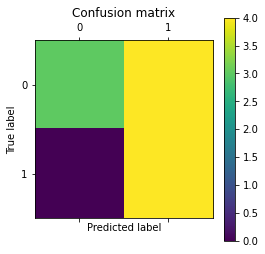


----------------Train Classification report ------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        26

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

------------------- Test Classification report -------------------

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.50      1.00      0.67         4

    accuracy                           0.64        11
   macro avg       0.75      0.71      0.63        11
weighted avg       0.82      0.64      0.62        11



In [113]:
# Make predictions on the test data
y_pred=dtc.predict(xtest)
# Make predictions on the train data
y_train_pred = dtc.predict(xtrain)
# Make predictions on the test data
y_pred=dtc.predict(xtest)

#Printing the actual and predicted values
predicts=pd.DataFrame({'Actual_vals': ytest , 'Predicted_vals':y_pred})
print(predicts)
print('Test error: ' + str(np.mean(y_pred != ytest)))

print('------------------- Confusion matrix -------------------')
pt.matshow( confusion_matrix(ytest, y_pred))
pt.title('Confusion matrix')
pt.colorbar()
pt.ylabel('True label')
pt.xlabel('Predicted label')
pt.show()
print('')
print('----------------Train Classification report ------------------')
print('')
print(classification_report(ytrain, y_train_pred))
print('------------------- Test Classification report -------------------')
print('')
print(classification_report(ytest, y_pred))


First, I printed some experimental (or actual) values and the prediction that the model did. The model made good predictions, with an error ~0.4, which is relatively high .In addition, in the confusion matrix it can be seen that the model made some mistakes (4 false negatives). It can be due to this model is overfitter (watch train classification report). So, this model is fitted to explain the train data whereas it introduces some mistakes when new data (test data) is tested. In addition, when predicting, this model has an accuracy of 0.88. This indicates that when a net input data is introduced in this model it can not make good predictions due to it is fitted to explain the variability in the train data.

Since, I chose the best parameters to use in random forest according to GridSearch, the only way I think this probem can be solved is collecting more data. With a larger train set, the model would have been improved its training. 

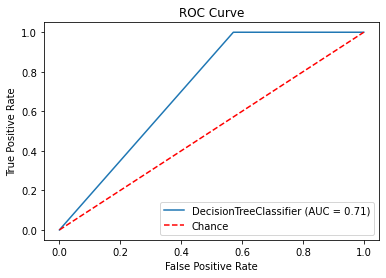

In [114]:
plot_roc_curve(dtc,xtest,ytest)
pt.title('ROC Curve')
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
pt.plot([0,1],[0,1],linestyle='--',color='r',label="Chance")
pt.legend()
pt.show()

On the other hand, the AUC obtained is 0.71, indicating that this model is a normal classifier that can be used to classify the data but it has not good accuracy, as I explained above.

## Random Forest

A random forest is a machine learning algorithm that is used for classification and regression tasks. It is a type of ensemble learning method, which means that it combines the predictions of multiple individual models (called "decision trees") to make a final prediction.

The basic idea behind random forests is to train a large number of decision trees on subsets of the data, and then combine the predictions of these decision trees to make a final prediction. Each decision tree in the random forest is trained on a random subset of the data, and the final prediction is made by averaging the predictions of all the trees (Aurélien G., 2019).

According to GridSearch, the best parameters for RandomForestClassifier are {'max_depth': 5, 'n_estimators': 100} 

    Actual_vals  Predicted_vals
49            0               0
44            1               0
17            1               1
31            0               1
45            0               0
46            0               0
34            0               0
32            0               0
6             1               1
52            0               0
2             1               1
Test error: 0.18181818181818182
------------------- Confusion matrix -------------------


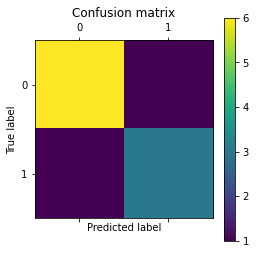


----------------Train Classification report ------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        26

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

------------------- Test Classification report -------------------

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.75      0.75      0.75         4

    accuracy                           0.82        11
   macro avg       0.80      0.80      0.80        11
weighted avg       0.82      0.82      0.82        11



In [115]:
rf = RandomForestClassifier(max_depth = 5, n_estimators = 100)
rf.fit(xtrain, ytrain)
# Make predictions on the train data
y_train_pred = rf.predict(xtrain)
# Make predictions on the test data
y_pred=rf.predict(xtest)


#Printing the actual and predicted values
predicts=pd.DataFrame({'Actual_vals': ytest , 'Predicted_vals':y_pred})
print(predicts)
print('Test error: ' + str(np.mean(y_pred != ytest)))

print('------------------- Confusion matrix -------------------')
pt.matshow( confusion_matrix(ytest, y_pred))
pt.title('Confusion matrix')
pt.colorbar()
pt.ylabel('True label')
pt.xlabel('Predicted label')
pt.show()
print('')
print('----------------Train Classification report ------------------')
print(classification_report(ytrain, y_train_pred))
print('------------------- Test Classification report -------------------')
print('')
print(classification_report(ytest, y_pred))


First, I printed some experimental (or actual) values and the prediction that the model did. The model made good predictions, with an error ~0.2, which is relatively low .In addition, in the confusion matrix it can be seen that the model made few mistakes. Nevertheless, this model is overfitter (watch train classification report). So, this model is fitted to explain the train data whereas it introduces some mistakes when new data (test data) is tested. However, when predicting, this model has an accuracy of 0.88. This indicates that this models does not make heavy mistakes when new input data is introduced.

Since, I chose the best parameters to use in random forest according to GridSearch, the only way I think this probem can be solved is collecting more data. With a larger train set, the model would have been improved its training. 

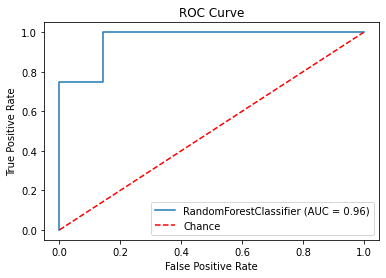

In [116]:
plot_roc_curve(rf,xtest,ytest)
pt.title('ROC Curve')
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
pt.plot([0,1],[0,1],linestyle='--',color='r',label="Chance")
pt.legend()
pt.show()

On the other hand, according to the AUC value of this model (0.96), it is quite good classifier. However, the best model for predicting NR or R in patients according to their SNPs is still k-NN.

## MLP

A multilayer perceptron (MLP) is a type of artificial neural network that is commonly used for supervised learning tasks, An MLP consists of an input layer, one or more hidden layers, and an output layer. Each layer consists of a set of neurons, which are connected to the neurons in the previous and subsequent layers through weights. The weights of the connections between the neurons are adjusted during the training process in order to improve the model's accuracy.

The input layer receives the input data, and the output layer produces the model's prediction based on the input data and the weights of the connections between the neurons. The hidden layers process the input data and transmit it to the output layer Goodfellow, i., et al, n.d. & Nielsen, M., n.d.).

According to GridSearch, the best parameters for MLP are  {'activation': 'tanh', 'alpha': 10, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'} 

    Actual_vals  Predicted_vals
49            0               0
44            1               1
17            1               1
31            0               1
45            0               0
46            0               0
34            0               0
32            0               1
6             1               1
52            0               0
2             1               1
Test error: 0.18181818181818182
------------------- Confusion matrix -------------------


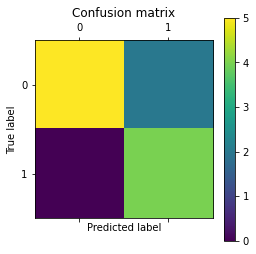


----------------Train Classification report ------------------

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.87      1.00      0.93        26

    accuracy                           0.90        42
   macro avg       0.93      0.88      0.89        42
weighted avg       0.92      0.90      0.90        42

------------------- Test Classification report -------------------

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.67      1.00      0.80         4

    accuracy                           0.82        11
   macro avg       0.83      0.86      0.82        11
weighted avg       0.88      0.82      0.82        11



In [117]:
#create and fit an mlp classifier

mlp = MLPClassifier(activation = 'tanh', alpha = 10, hidden_layer_sizes = (100,), solver = 'lbfgs') 
mlp.fit(xtrain, ytrain)
# Make predictions on the train data
y_train_pred = mlp.predict(xtrain)
# Make predictions on the test data
y_pred=mlp.predict(xtest)


#Printing the actual and predicted values
predicts=pd.DataFrame({'Actual_vals': ytest , 'Predicted_vals':y_pred})
print(predicts)
print('Test error: ' + str(np.mean(y_pred != ytest)))
print('------------------- Confusion matrix -------------------')
pt.matshow( confusion_matrix(ytest, y_pred))
pt.title('Confusion matrix')
pt.colorbar()
pt.ylabel('True label')
pt.xlabel('Predicted label')
pt.show()
print('')
print('----------------Train Classification report ------------------')
print('')
print(classification_report(ytrain, y_train_pred))
print('------------------- Test Classification report -------------------')
print('')
print(classification_report(ytest, y_pred))


First, I printed some experimental (or actual) values and the prediction that the model did. The model made good predictions, with an error ~0.2, which is relatively low . However, in the confusion matrix, it can be seen that there are 3 false positives. 
This model was well trained and it is able to explain the variability in the train data with an accuracy of 0.90. However, it has a low precision when predicting label 1. In addition, its F1-score is lower when predicting labels and it has an accuracy of 0.82.

Here, I displayed the learning curve that can be used to visualize the relationship between the model's performance on the training and validation sets as the number of training examples increases.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1471: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 37 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


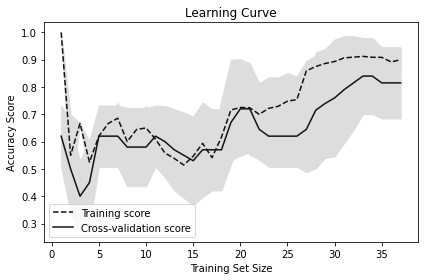

In [118]:
#plot learning curve
train_sizes, train_scores, test_scores = learning_curve(mlp, xtrain, ytrain, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
pt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
pt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
pt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
pt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
pt.title("Learning Curve")
pt.xlabel("Training Set Size"), pt.ylabel("Accuracy Score"), pt.legend(loc="best")
pt.tight_layout()
pt.show()

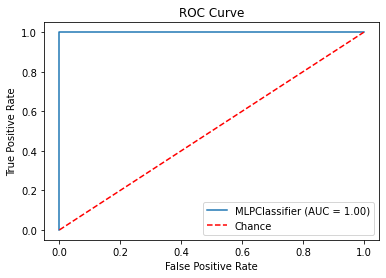

In [119]:
plot_roc_curve(mlp,xtest,ytest)
pt.title('ROC Curve')
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
pt.plot([0,1],[0,1],linestyle='--',color='r',label="Chance")
pt.legend()
pt.show()

Since it is a good classifier (AUC=1.00) and in the learning curve it can be seen that as well as the training set size is higher, this model improves its development, the conclusion I retreived for this model is similar to others: having a higher data set would improved the learning about the data features for predicting NR and R labels. So, I would have collected more data and then, applied Supervised Machine Learning algorithms

Nevertheless, according to the results obtained in this dataset, the best model for predicting the behavior of the drug in the patient depending on their SNPs is k-NN model, using the following parameters: n_neighbors = 12 ,metric='euclidean',algorithm='auto', leaf_size= 5,weights='uniform'.

# References

1. https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

2. https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4

3. Bownlee, J., 2016, What is a Confusion Matrix in Machine Learning. Available online: https://machinelearningmastery.com/confusion-matrix-machine-learning/ [Visited on 16/12/2022].

4. Sperandei S., 2014, Understanding logistic regression analysis. Biochem Med (Zagreb).  15;24(1):12-8. doi: 10.11613/BM.2014.003. PMID: 24627710; PMCID: PMC3936971.

5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

6. https://en.wikipedia.org/wiki/Receiver_operating_characteristic

7. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

8. https://www.statdeveloper.com/regresion-logistica-en-python/

9. https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1

10. Aurélien G., 2019. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

11.  Ian Goodfellow, Yoshua Bengio, and Aaron Courville, n.d. Deep Learning

12. Nielsen Michael, n.d. Neural Networks and Deepl Learning.

13. Tom Fawcett., n.d. An Introduction to ROC Analysis". Available on:  https://ccrma.stanford.edu/workshops/mir2009/references/ROCintro.pdf